<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week10_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Hana Sugianto**

**NIM   : 2241720102**

**Kelas : TI 3E / 14**

# **Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

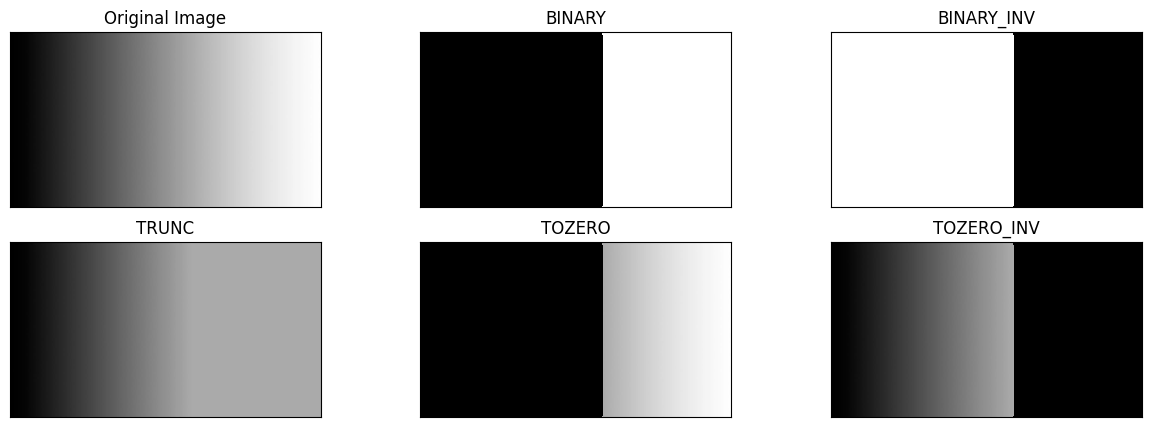

In [ ]:
filename = ('/content/drive/MyDrive/PCVK_2024/image/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

###### **Otsu Thresholding tanpa menggunakan Library.**

167


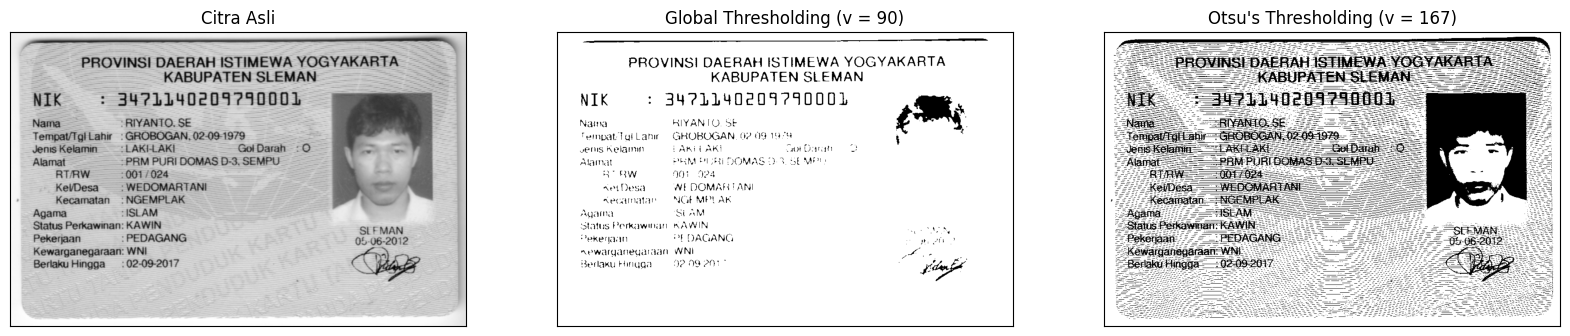

In [ ]:
filename = ('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
# ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

##### **Histogram dari citra tersegmentasi**

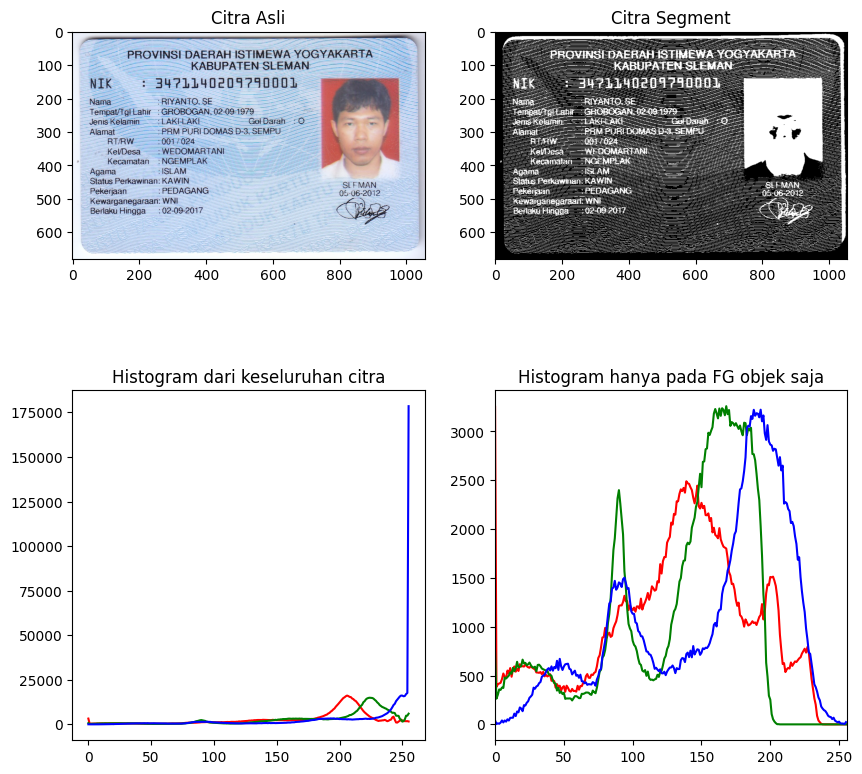

In [ ]:
filename = ('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)

plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')

  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

##### **Segmentasi warna pada image " ktp Riyanto.jpg**

(<Axes: >, <matplotlib.image.AxesImage at 0x7b8c75ebf370>)

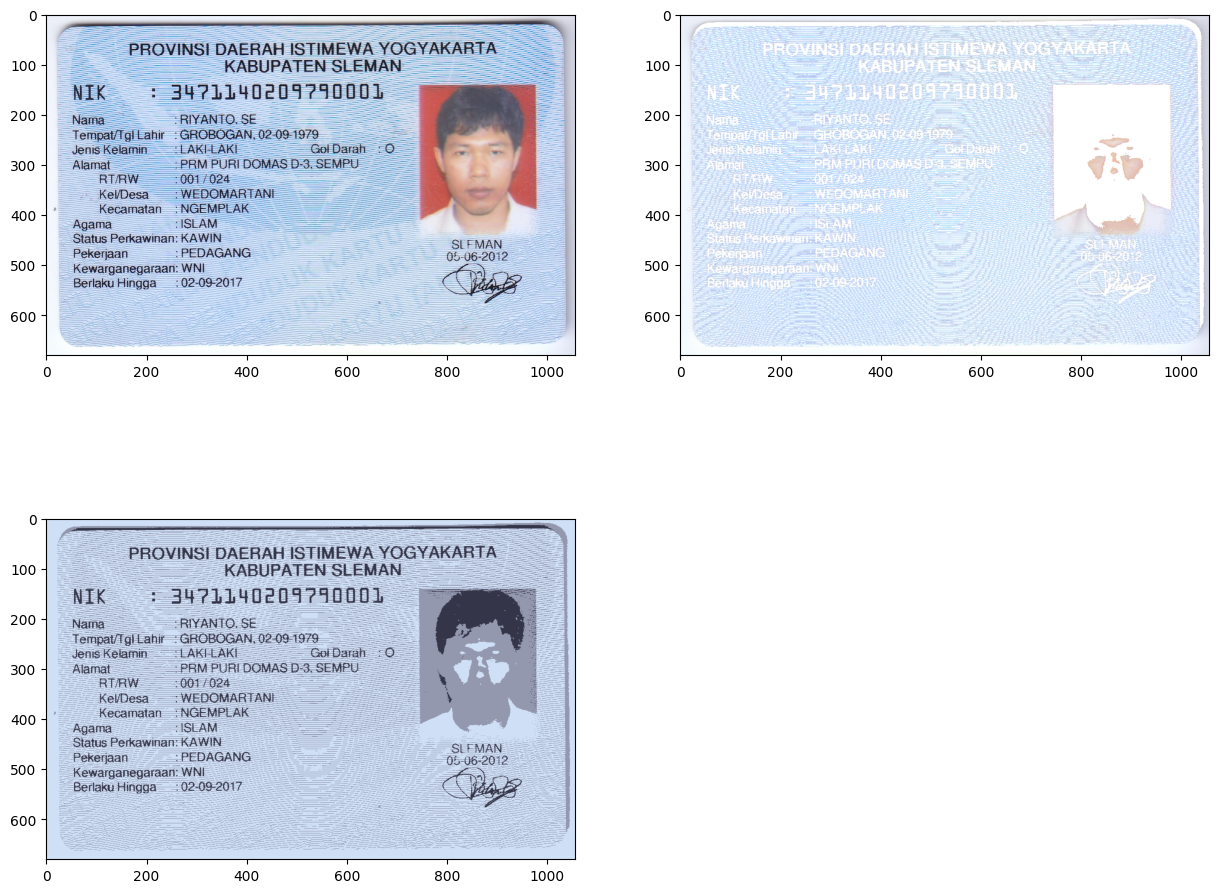

In [ ]:
filename = ('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid
sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data
yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn
posisi centroid di iterasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid kedalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

**Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan.**

In [4]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,536 kB/s)
debconf: unable to ini

In [5]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [6]:
from pytesseract import Output

img = cv.imread('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)

print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


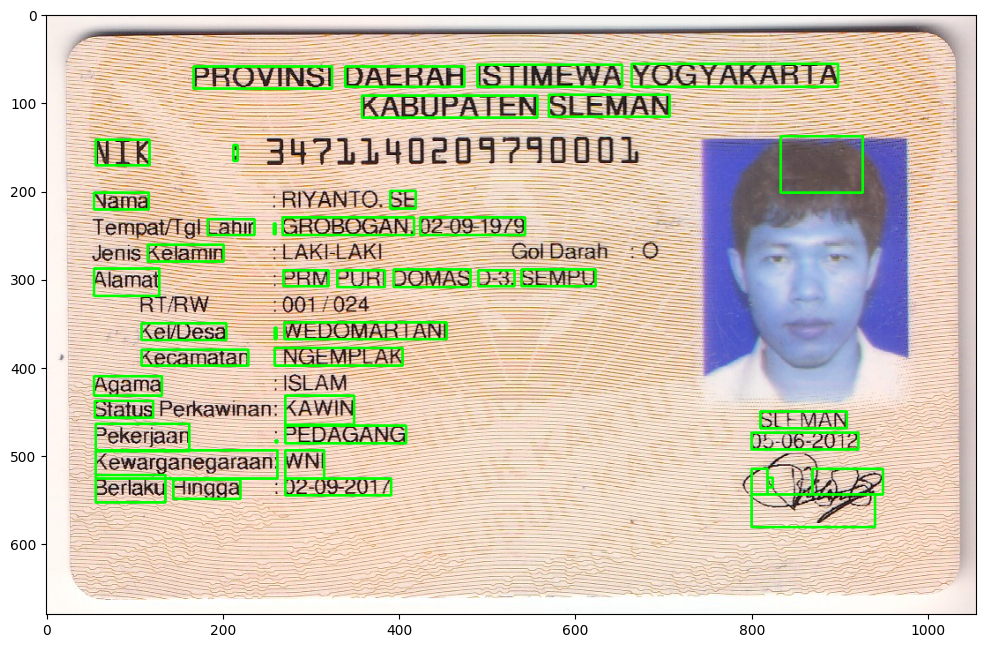

In [9]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



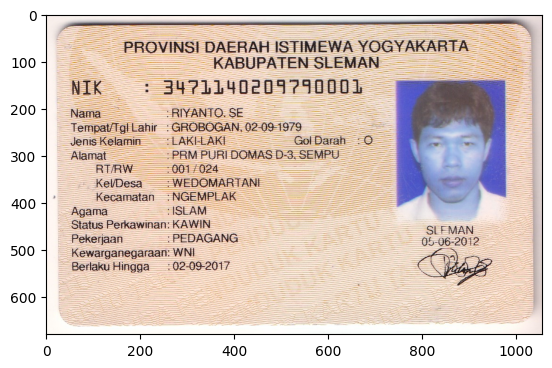

In [8]:
img = cv.imread("/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png")
plt.imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

# **TUGAS**

Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan **GLOBAL THRESHOLDING** dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

Global Threshold

In [11]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

Hasil OCR dari KTP:
em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



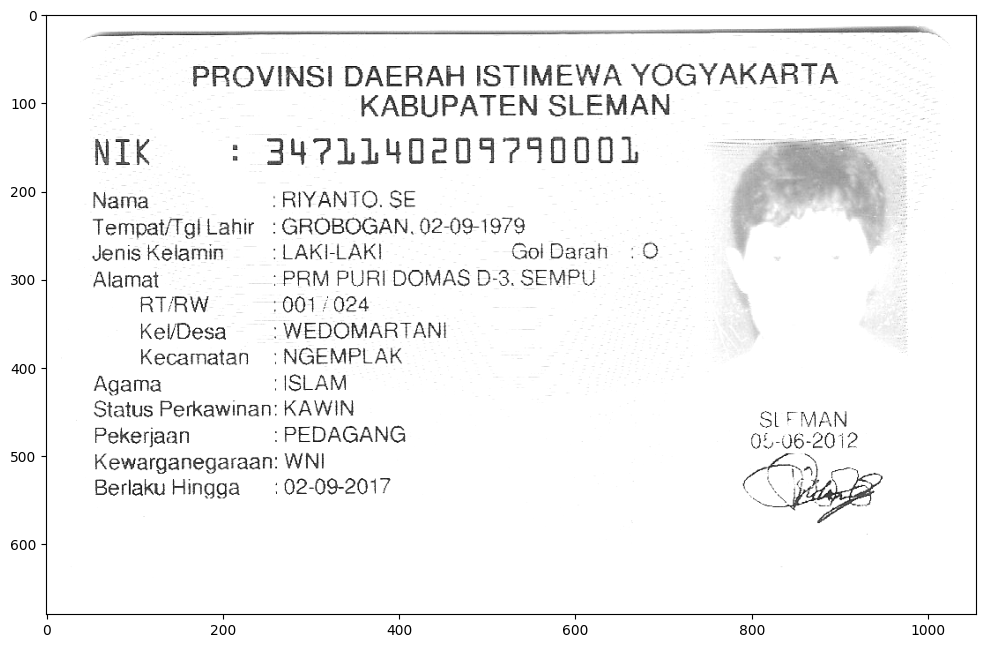

In [18]:
# Load gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')

# Konversi citra ke grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
th, thresholded_image = cv.threshold(gray, 127, 255, cv.THRESH_BINARY + cv.THRESH_TRUNC)

# Tampilkan gambar hasil thresholding
display(thresholded_image)

# Terapkan OCR menggunakan pytesseract untuk membaca teks
text_data = pytesseract.image_to_data(threshed, output_type=Output.DICT)
text = pytesseract.image_to_string(thresholded_image, lang='ind')

# Output hasil teks
print("Hasil OCR dari KTP:")
print(text)

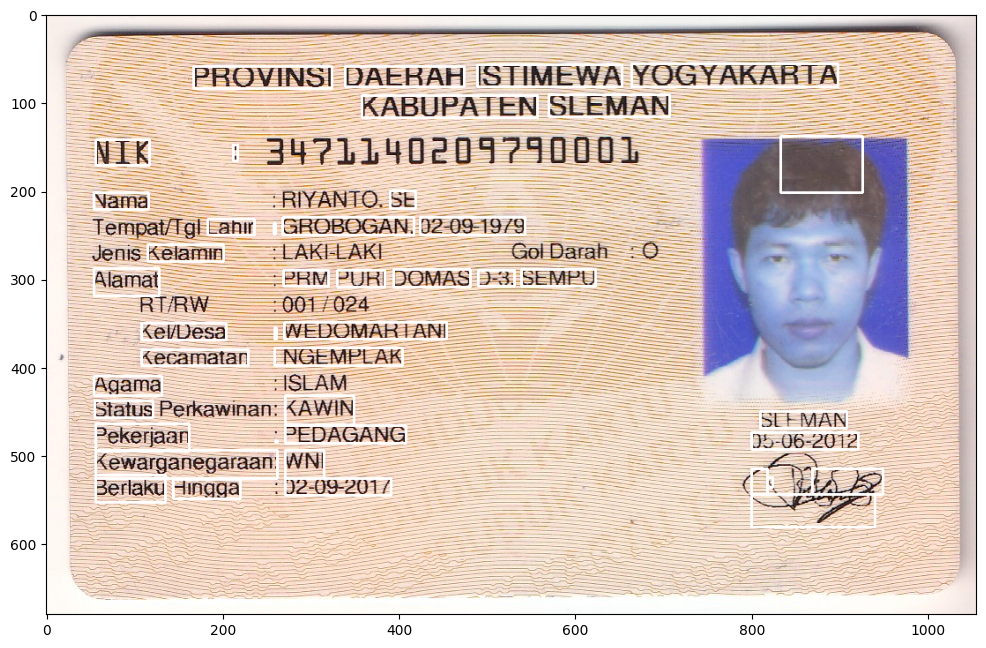

In [20]:
n_boxes = len(text_data['text'])
for i in range(n_boxes):
  if int(text_data['conf'][i]) > 60:
    (x, y, w, h) = (text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i])
    img = cv.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 2)

display(img)

Otsu..

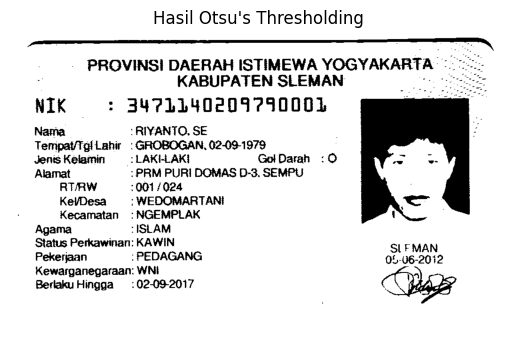

Teks yang Terbaca:
    

PROVINSI DAERAH ISTIMEWA YOGYAKARTA

KABUPATEN SLEMAN
NIK 1 3471140209790001
Nama : RIYANTO. SE
Tempat/Tgi Lahir : GROBOGAN, 02-09-1979
Jenis Kelamin #LAKILAKI Gol Darah : 0
Alamat :PRM PURI DOMAS D-3, SEMPU
RTRW 10017024

KelDesa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG SL MAN

04-06-2012
Kewarganegaraan: WNI 1
Berlaku Hingga 02-09-2017 ag

Blok 1:         
Confidence rata-rata: 95.00

Blok 2: | OASRAH ISTHAEWA YORYAKARTA a KABUPATEN SLEMAN :
Confidence rata-rata: 40.12

Blok 3: WK : 3472L40209790003 ° AV ARTD. SE q SPAM, Hab 979 ARAL ag Cet Geeah | RMP OCS 0-3. SEM Rie | = iO ee Kees Katara Bony 1S Abe Shaes Porcrsanan: KAW Peneyaan PEDAGAMC
Confidence rata-rata: 27.69



In [ ]:
# Baca citra KTP
image = cv.imread('/content/drive/MyDrive/PCVK_2024/image/ktp Riyanto.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Terapkan Gaussian Blur untuk mengurangi noise sebelum Otsu's Thresholding
blur = cv.GaussianBlur(gray, (3,3), 0)

# Otsu's Thresholding
_, thresholded_image = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Tampilkan hasil thresholding
plt.imshow(thresholded_image, cmap='gray')
plt.title("Hasil Otsu's Thresholding")
plt.axis('off')
plt.show()

# Gunakan OCR untuk membaca teks
text1 = pytesseract.image_to_data(thresholded_image, output_type='data.frame')
text2 = pytesseract.image_to_string(thresholded_image, lang="ind")
print("Teks yang Terbaca:\n", text2)

# Filter data hasil OCR untuk mendapatkan teks dan confidence
text = text1[text1.conf != -1]  # Memfilter baris yang memiliki nilai 'conf' -1 (artinya OCR gagal membaca teks tersebut)
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby('block_num')['conf'].mean()

# Tampilkan teks per blok dan tingkat kepercayaan (confidence)
for i, line in enumerate(lines, start=1):
    print(f"Blok {i}: {' '.join(line)}")
    print(f"Confidence rata-rata: {conf[i]:.2f}\n")
